In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('MS_Dhoni_ODI_record.csv')

In [4]:
#Basic Checks
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [5]:
df.tail()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187
349,50,50,72,69.44,1,1,v New Zealand,Manchester,09/07/2019,ODI # 4190


In [6]:
#data cleaning-opposition name says'v Aus' etc,we ran remove 'v'
# df["opposition"]=df['opposition'].apply(lambda x:x[2:])
df["opposition"]=df['opposition'].str.replace('v ',"",regex=False)


In [7]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [8]:
#Add afeature year column using the match date column
df["date"]=pd.to_datetime(df['date'],dayfirst=True)
df['year']=df["date"].dt.year.astype(int)
df["year"]

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int32

In [9]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [10]:
df.drop(columns="odi_number",inplace=True)

In [11]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [12]:
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored' : ]
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [13]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [14]:
# Career Stats
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # first match
print("First match: ", first_match_date)

First match:  December 23, 2004


In [15]:
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # first match
print("Last match: ", last_match_date)

Last match:  July 09, 2019


In [16]:
number_of_matches = df.shape[0]
print("Number of matches played: ", number_of_matches)

Number of matches played:  350


In [17]:
number_of_inns = df_new.shape[0]
print("Number of innings: ", number_of_inns)

Number of innings:  297


In [18]:
not_outs = df_new['not_out'].sum()
print("Not outs: ", not_outs)

Not outs:  84


In [19]:
runs_scored = df_new['runs_scored'].sum()
print("Runs scored: ", runs_scored)

Runs scored:  10773


In [20]:
balls_faced = df_new['balls_faced'].sum()
print("Balls faced in career: ", balls_faced)

Balls faced in career:  12303


In [21]:
career_sr = (runs_scored / balls_faced)*100
print('Career strike rate: {:.2f}'.format(career_sr))

Career strike rate: 87.56


In [22]:
career_avg = (runs_scored / (number_of_inns - not_outs))
print('Career Average: {:.2f}'.format(career_avg))

Career Average: 50.58


In [23]:
hundreds = (df_new['runs_scored'] >= 100).sum()
print("Number of 100s: ", hundreds)

Number of 100s:  10


In [24]:
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
print("Number of 50s: ", fifties)

Number of 50s:  73


In [25]:
fours = df_new['fours'].sum()
print("Number of 4s: ", fours)

Number of 4s:  826


In [26]:
sixes = df_new['sixes'].sum()
print("Number of 6s: ", sixes)

Number of 6s:  229


In [27]:
# Number of matched played against each opposition
Count the occurences of each unique value in the 'opposition' column

SyntaxError: invalid syntax (<ipython-input-27-1f4cc9cb9f9e>, line 2)

In [28]:
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)

Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Afghanistan      2
Hong Kong        2
Ireland          2
Scotland         1
Bermuda          1
Netherlands      1
U.A.E.           1
Name: opposition, dtype: int64


<Axes: title={'center': 'Number of matche against different oppositions'}>

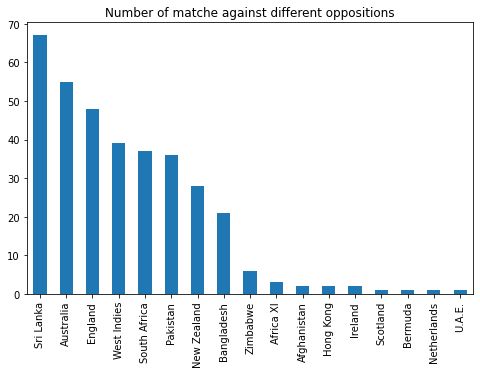

In [29]:
#  Plot the counts as a bar plot
opposition_counts.plot(kind = 'bar', title = 'Number of matche against different oppositions', figsize = (8, 5))

In [30]:
# Runs sored gainst each team


In [31]:
grouped_by_opposition = df_new.groupby('opposition')
grouped_by_opposition

In [32]:
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


<Axes: title={'center': 'runs_scored_by_opposition'}, xlabel='opposition'>

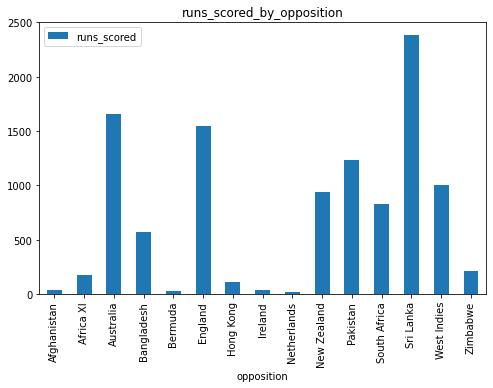

In [33]:
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x = 'opposition', kind = 'bar', title = 'runs_scored_by_opposition', figsize = (8, 5))

<Axes: xlabel='opposition', ylabel='runs_scored'>

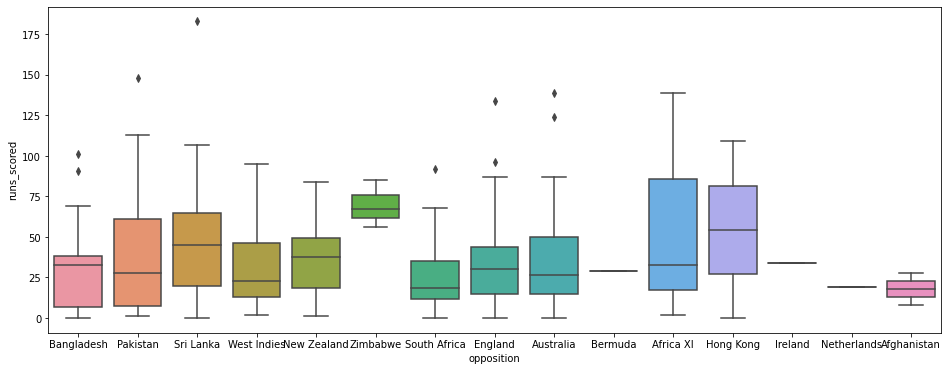

In [34]:
#boxplot
plt.figure(figsize=(16,6))
sns.boxplot(x="opposition",y="runs_scored",data=df_new)

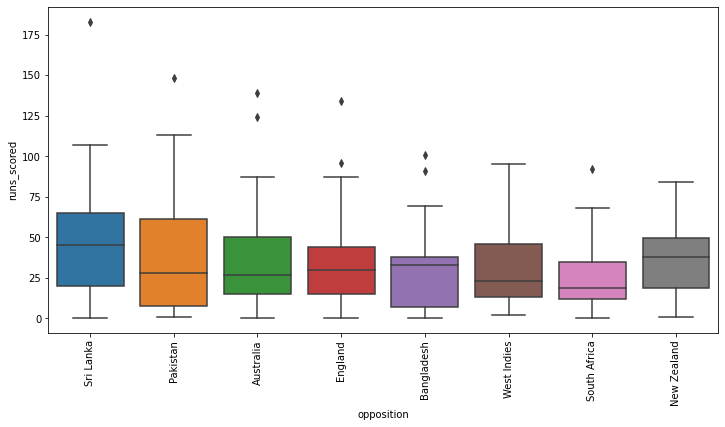

In [35]:
#filtering and replotting box plot
opposition=["England","Australia","West Indies","South Africa","New Zealand","Pakistan","Sri Lanka","Bangladesh"]

df_filtered=df_new[df_new["opposition"].isin(opposition)]
df_filtered=df_filtered.sort_values(by="runs_scored",ascending=False)


#redrawing
plt.figure(figsize=(12,6))
sns.boxplot(x="opposition",y="runs_scored",data=df_filtered)
plt.xticks(rotation=90)
plt.show()

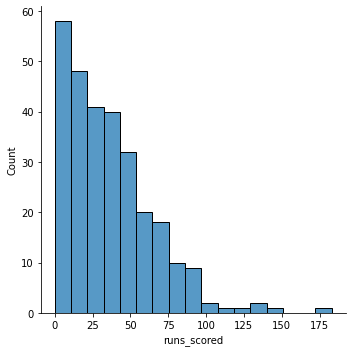

In [36]:
#histogram with and without kde(kernel density estimation)
sns.displot(data=df_filtered,x="runs_scored",kde=False)
plt.show()


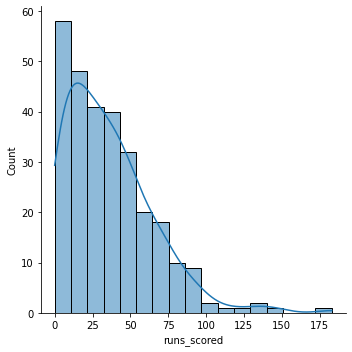

In [37]:
sns.displot(data=df_filtered,x="runs_scored",kde=True)
plt.show()
#we see that there is a right/positive skew, so there is a long tail to the right

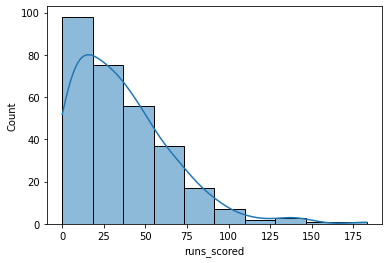

In [38]:
sns.histplot(data=df_new,x="runs_scored",bins=10,kde=True)
plt.show()

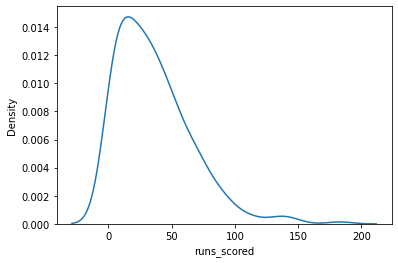

In [39]:
sns.kdeplot(data=df_new,x='runs_scored')
plt.show()
#gives probability distribution

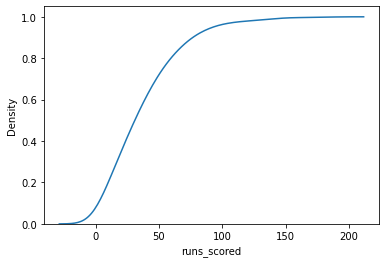

In [40]:
sns.kdeplot(data=df_new,x='runs_scored', cumulative = True)
plt.show()

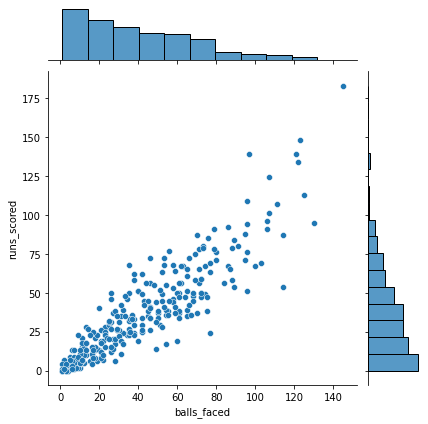

In [41]:
#jointplot
sns.jointplot(x="balls_faced",y='runs_scored',kind="scatter",data=df_new)

## Heat-Map

In [42]:
# heat map
# Calculate the correlation matrix

correlation_matrix = df_new[['balls_faced', 'runs_scored']].corr()

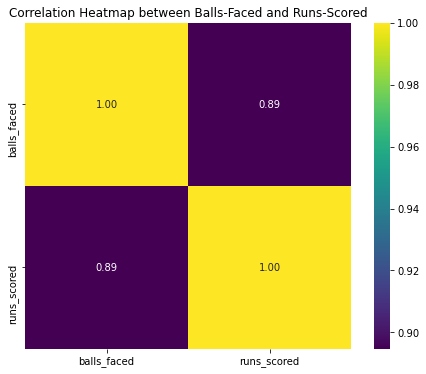

In [43]:
# Create the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot = True, cmap= 'viridis', square = True, fmt = ".2f")
plt.title("Correlation Heatmap between Balls-Faced and Runs-Scored")
plt.show()

              balls_faced  runs_scored
opposition                            
Australia            2052         1660
Bangladesh            682          569
England              1758         1546
New Zealand          1140          940
Pakistan             1361         1231
South Africa          950          830
Sri Lanka            2645         2383
West Indies          1108         1005


<Axes: ylabel='opposition'>

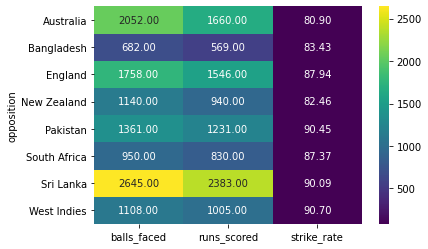

In [48]:
filtered_data = df_new['strike_rate'].astype(int)

grouped_by_opposition = df_filtered.groupby("opposition")

agg_sum = grouped_by_opposition.agg({'balls_faced': 'sum', 'runs_scored': 'sum'})

df_strike_rate = agg_sum

print(agg_sum)


# Calculate Strike rate
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored'])/df_strike_rate['balls_faced'] * 100

# Bad graph - strike rate scale is different from runs scored and balls faced
sns.heatmap(data = df_strike_rate, annot = True, cmap = 'viridis', square = False, fmt = "0.2f")


# correlation_matrix = df_new[['opposition', 'strike_rate']].corr()

In [47]:
#Just trying SR came out to be greater than the actual calculated SR
# df_new["strike_rate"] = df_new['strike_rate'].astype(int)
# df_new.groupby("opposition")["strike_rate"].mean()


opposition
Afghanistan      50.000000
Africa XI        93.000000
Australia        81.979167
Bangladesh       93.705882
Bermuda         116.000000
England          92.181818
Hong Kong        56.500000
Ireland          68.000000
Netherlands      47.000000
New Zealand      79.692308
Pakistan         90.935484
South Africa     84.187500
Sri Lanka        83.773585
West Indies     100.636364
Zimbabwe        112.666667
Name: strike_rate, dtype: float64

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# df7=df_filtered.groupby("opposition")["runs_scored"].sum().reset_index()
# print(df7)
# plt.bar(df7["opposition"],df7["runs_scored"])

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [96]:

# df["fours"]=pd.to_numeric(df["fours"],errors="coerce")
# df["sixes"]=pd.to_numeric(df["sixes"],errors="coerce")
# df6=df[["opposition","sixes","fours"]]
# a=df6.groupby("opposition")["fours"].sum().reset_index()
# b=df6.groupby("opposition")["sixes"].sum().reset_index()
# a["runs4"]=a["fours"]*4

# a["runs6"]=b["sixes"]*6
# a
# a["bs"]=a["runs6"]+a["runs4"]
# a["runs_scored"]=df7["runs_scored"]
# a
# df7["four"]=df["fours"]
# df7["six"]=df["sixes"]
# df7

In [97]:
# plt.figure(figsize=(10,6))
# plt.bar(a["opoosition"])










                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      c


In [98]:
import matplotlib.pyplot as plt

In [103]:
df_filtered

,level_0,index,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,21,183,145,126.20,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1
1,1,4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
2,2,228,139,121,114.87,12,5,Australia,Mohali,2013-10-19,2013,1
3,3,284,134,122,109.83,10,6,England,Cuttack,2017-01-19,2017,0
4,4,146,124,107,115.88,9,3,Australia,Nagpur,2009-10-28,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,74,0,4,0.00,0,0,South Africa,Belfast,2007-06-29,2007,0
280,280,273,0,3,0.00,0,0,Australia,Canberra,2016-01-20,2016,0
281,281,171,0,1,0.00,0,0,Australia,Visakhapatnam,2010-10-20,2010,0
282,282,223,0,4,0.00,0,0,England,Birmingham,2013-06-23,2013,0


In [114]:
df7 = df_filtered.groupby("opposition")["runs_scored"].sum().reset_index()
df_fours = df_filtered.groupby("opposition")["fours"].sum().reset_index()
df_sixes = df_filtered.groupby("opposition")["sixes"].sum().reset_index()
df7["bs"] = 4*df_fours["fours"] + 6*df["sixes"]
df7

,opposition,runs_scored,bs
0,Australia,1660,448.0
1,Bangladesh,569,196.0
2,England,1546,522.0
3,New Zealand,940,292.0
4,Pakistan,1231,456.0
5,South Africa,830,268.0
6,Sri Lanka,2383,734.0
7,West Indies,1005,252.0


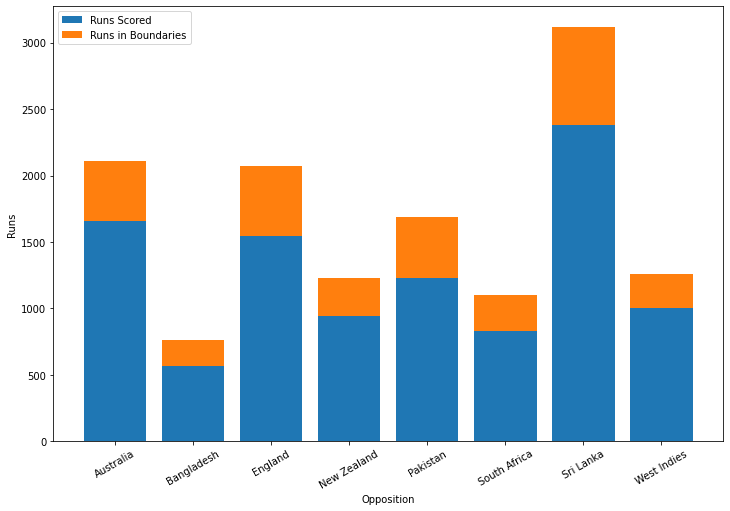

In [131]:
plt.figure(figsize=(12,8))
plt.bar(df7["opposition"], df7["runs_scored"], label = "Runs Scored")
plt.bar(df7["opposition"], df7["bs"], bottom = df7["runs_scored"], label = "Runs in Boundaries")
plt.xlabel("Opposition")
plt.ylabel("Runs")
plt.xticks(rotation = 30)
plt.legend()